In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tweets = pd.read_csv("covid19_tweets.csv")
tweets

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74433,People's Daily app,"北京, 中华人民共和国",Our mission is to provide news and perspective...,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App,False
74434,M0ser,NaN,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False


In [8]:
print("Cantidad de datos en el archivo:", len(tweets.index) * len(tweets.columns))

Cantidad de datos en el archivo: 967668


In [19]:
print("Variables que contiene cada vector de datos:")
variables = tweets.columns
for i in variables:
    print("-", i)

Variables que contiene cada vector de datos:
- user_name
- user_location
- user_description
- user_created
- user_followers
- user_friends
- user_favourites
- user_verified
- date
- text
- hashtags
- source
- is_retweet


En general, por la información y las variables contenidas en el documento, se puede inferir que recopila 74,436 tweets de usuarios de muchas locaciones, y por cada tweet aparecen 13 variables, las cuáles proveen información más específica.

In [20]:
print("Tipo de variables:")
tVariables = tweets.dtypes
tVariables

Tipo de variables:


user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

Aquí podemos observar el tipo de dato que contiene cada variable, y cabe resaltar que la última fila que arroja "dtype: object" no está en el documento, apareció por el comando utilizado para obtener la información. Las variables que contienen "object" significa que contienen una cadena de caracteres alfanuméricos o incluso caracteres especiales; las que aparecen como "int64" contienen solo números enteros; y las que aparecen con la leyenda "bool" significa que solo son verdadero o falso.  A continuación se dará una breve descripción de lo que representa cada una de las variables.
    user_name: El nombre de usuario asignado a la cuenta de twitter.
    user_location: El lugar geográfico donde se encontró la persona al momento de publicar el tweet.
    user_description: Alguna información adicional que el usuario agregó a su perfil.
    user_created: La fecha y la hora en la que fue creada esa cuenta de twitter.
    user_followers: La cantidad de seguidores que tiene cada usuario en su cuenta.
    user_friends: La cantidad de amigos que la persona tiene en su cuenta.
    user_favourites: El número de personas que cada usuario tiene marcado como favoritos.
    user_verified: Sólo aparece verdadero si el usuario tiene su cuenta verificada.
    date: La fecha y la hora en la que cada usuario publicó su respectivo tweet.
    text: Muestra el contenido del tweet de cada usuario.
    hashtags: Aparece si el usuario utilizó algún hashtag al realizar su publicación.
    source: Revela la fuente digital donde se utilizó twitter al realizar el tweet.
    is_retweet: Sólo es verdadero si el tweet de cada usuario fue compartido por más personas.

In [3]:
numericos = tweets.select_dtypes(include = ["int"])
numericos.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


En las tablas de arriba se muestran los datos estadísticos de las variables que contienen enteros. Count muestra el conteo de los datos que aparecen en las variables; mean y std muestran el promedio y la desviación estándar de los datos. Por otra parte, min y max nos arrojan el dato más bajo y más alto de cada variable; y por último, los porcentajes nos arrojan un valor donde ese porcentaje de datos son menores que el valor que aparece; por ejemplo, usando la tabla de arriba podemos decir que en user_followers, el 25% de los valores de esa variable son menores a 166.

Un aspecto, muy importante a notar es que el valor del 50% representa la mediana de los valores; por lo que en esta tabla podemos apreciar datos estadísticos muy importantes de las variables, tales como la media, desviación estándar, la mediana y los rangos (máximos y mínimos).

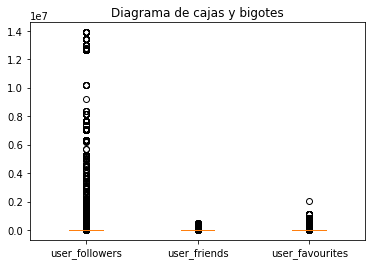

In [8]:
plt.boxplot(numericos, labels = ["user_followers", "user_friends", "user_favourites"])
plt.title("Diagrama de cajas y bigotes")
plt.show()

En la gráfica, se observan los rangos de cada variable que contiene solo números enteros, donde podemos ver la representación de los máximos y mínimos, así como los valores que están que están dentro del rango. Se puede observar que los datos más dispersos son en la variable user_followers, donde hay usuarios que tienen 0 seguidores y hay otro que tiene casi 14,000,000 seguidores; y es por eso que la desviación estándar es mayor. Entre mayor sea el rango en el que se encuentren los datos, mayor será la desviación estándar.

In [9]:
objetos = tweets.select_dtypes(include = ["object"])
objetos.describe().transpose()

,count,unique,top,freq
user_name,74436,44853,GlobalPandemic.NET,312
user_location,59218,14622,India,1496
user_description,70079,42690,Breaking News & Critical Information to SURVIV...,312
user_created,74436,45554,2010-07-13 21:58:05,312
date,74436,56546,2020-07-29 16:30:00,26
text,74436,74312,Greenland has no active cases of the novel cor...,6
hashtags,53002,23445,['COVID19'],16004
source,74424,450,Twitter Web App,22974


En la tabla de arriba están las descripciones de las variables que tienen datos como string o caracteres. De igual manera, count es el conteo de datos por variable; unique son los datos que del total no se repiten; top son los datos que más se repiten, y freq la frecuencia con la que se repiten.

Como se mostró arriba, el total de tweets en la base de datos son 74,436; y sería lógico que en el apartado "count" de todas las variables aparezca el número total; sin embargo, esto solo deja ver que no todos los tweets contienen datos en todas las variables, ya que algunas veces no se logra recopilar la información completa.

In [10]:
boolean = tweets.select_dtypes(include = ["bool"])
boolean.describe()

,user_verified,is_retweet
count,74436,74436
unique,2,1
top,False,False
freq,65082,74436


Por último, está tabla muestra las descripciones de las variables booleanas; es decir, que solo contienen como dato "verdadero" o "falso", por lo que los datos únicos pueden ser esas dos opciones. Se observa que la mayoría de los usuarios no poseen una cuenta verificada; y que además, ningún tweet de todos los usuarios fue compartido por más personas.